<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 12: Reinforcement Learning (RL)**

In this session, we will cover:
1. Introduction to Reinforcement Learning
2. Markov Decision Processes (MDPs)
3. Q-Learning
4. Policy Gradient Methods
5. Practice with OpenAI Gym
6. Visualization


# Introduction to Reinforcement Learning

Reinforcement Learning (RL) is a type of machine learning where an **agent** learns to make decisions by **interacting with an environment**. Unlike supervised learning, where models learn from fixed datasets, in RL the agent **actively explores**, **receives rewards**, and **improves** based on its own experiences.

The goal of the agent is to **maximize cumulative rewards** over time.

Key concepts:
- **Agent**: The learner or decision-maker.
- **Environment**: Everything the agent interacts with.
- **State (s)**: A snapshot of the environment at a particular moment.
- **Action (a)**: A move or decision the agent can make.
- **Reward (r)**: Feedback signal telling the agent how good/bad its action was.
- **Policy (π)**: The agent’s strategy — a mapping from states to actions.
- **Value Function (V(s))**: How good it is to be in a certain state.
- **Q-Value (Q(s,a))**: How good it is to take a specific action in a state.

In RL, problems are usually modeled as **Markov Decision Processes (MDPs)**, where the future depends only on the current state and action (not the past history).

In this session, we’ll explore two main types of reinforcement learning (RL) algorithms, each with a different way of helping the agent learn:

- **Value-based methods:** These algorithms learn how good it is to take certain actions in certain situations. A popular example is Q-Learning, where the agent tries to estimate the future rewards for each action and then picks the best one.

- **Policy-based methods:** Instead of estimating values, these algorithms learn the strategy (or policy) directly — that is, they learn how to act by improving the agent's behavior step by step. An example is Policy Gradient, where the agent adjusts its decisions to maximize rewards.

To bring these ideas to life, we’ll be using OpenAI Gym, a toolkit that lets us train and test our agents in fun, interactive environments like balancing a pole, playing games, or controlling robots!


# Objective of Reinforcement Learning

In reinforcement learning, the agent aims to **learn a policy** $ \pi $ that **maximizes expected cumulative rewards** over time.

Mathematically, the agent solves:
$$
\pi^* = \arg\max_\pi \mathbb{E} \left[ \sum_{t=0}^{\infty} \gamma^t r_t \right]
$$

Where:
- $ \pi $ is the policy (mapping from states to actions)
- $ r_t $ is the reward received at time step $t$
- $ \gamma $ is the discount factor (importance of future rewards, $0 < \gamma \leq 1$)

 - If 𝛾 = 0: The agent only cares about immediate reward (short-sighted).

 - If 𝛾 = 1: The agent cares about all future rewards equally (far-sighted), assuming infinite time steps.

 - If 0 < 𝛾: The agent balances short-term and long-term rewards. Future rewards are discounted, meaning they count less the farther they are in the future.

**Interpretation**:  
The agent doesn't just maximize immediate rewards — it also considers **future rewards**, discounted by how far into the future they are.

**Goal**: Find the best policy $ \pi^* $ that gives the highest long-term rewards!


In [ ]:
!pip install --upgrade gym
!pip install numpy==1.23.5

# To ensure compatibility with the latest Gym environment used in this notebook,
# we will install:
#   - gym version 0.26.2 (latest standard interface)
#   - numpy version 1.23.5 (compatible with this gym version)
#
# IMPORTANT: After running the following two commands,
# you MUST restart the Colab runtime manually.
# This ensures the downgraded numpy version is properly loaded.
# ---------------------------------------------------------
# Run the two lines below in a code cell:
# !pip install --upgrade gym
# !pip install numpy==1.23.5
#
# Then go to the Colab menu:  Runtime → Restart runtime
# After restart, re-run this notebook from the top.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827727 sha256=62eab5ec0d87a89d80f3dd9d3cca46fcaeaba1e81a873c212f39396606e606f4
  Stored in directory: /root/.cache/pip/wheels/1c/77/9e/9af5470201a0b0543937933ee99ba884cd237d2faefe8f4d37
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 107.1 MB/s eta 0:00:00
  Attempting uninstall:

In [1]:
import gym
import numpy
print("Gym version:", gym.__version__)
print("NumPy version:", numpy.__version__)


Gym version: 0.26.2
NumPy version: 1.23.5


This example shows how an agent behaves using a random policy — it chooses actions blindly without learning. While it technically uses a "policy" (random selection), it is not a policy-based RL algorithm, because there is no learning or optimization involved. This serves as a baseline for comparison with smarter, learning-based approaches.

This example demonstrates how a random agent behaves in the classic CartPole-v1 environment, a widely used reinforcement learning benchmark where the agent must balance a pole on a moving cart by choosing to move left or right. The agent receives a reward of +1 for every time step it keeps the pole upright. Since the agent in this example selects actions completely at random, its performance is highly variable and typically poor, with episodes ending when the pole falls or the cart moves out of bounds. The total reward indicates how long the agent managed to keep the pole balanced. This serves as a baseline to highlight the importance of learning and decision-making in dynamic control tasks. To visualize the agent’s behavior in Google Colab, where GUI windows can’t be displayed, we use render_mode="rgb_array" to capture each frame as an image and display it using matplotlib, allowing us to observe the simulation frame by frame. This simple demo sets the stage for introducing smarter reinforcement learning algorithms that learn optimal policies through experience.

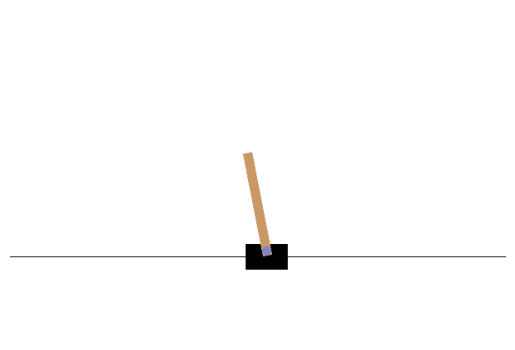

Total reward collected by random agent: 15.0


In [ ]:
# The performance of a random policy in the classic CartPole-v1 environment

import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Create the environment with rendering that returns image frames
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Reset the environment
obs, info = env.reset()
done = False
total_reward = 0

while not done:
    # Render returns an RGB frame (image array)
    frame = env.render()

    # Display the frame in the notebook
    clear_output(wait=True)
    plt.imshow(frame)
    plt.axis("off")
    plt.show()

    time.sleep(0.05)  # Slow down for visibility

    # Take a random action
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)

    done = terminated or truncated
    total_reward += reward

env.close()
print(f"Total reward collected by random agent: {total_reward}")


A score of 15 means the agent managed to keep the pole balanced for 15 steps before the episode ended, either because the pole fell too far or the cart moved out of bounds.

Since the agent chooses actions entirely at random, this result reflects pure chance rather than any form of strategy. While it occasionally survives for several steps, performance is inconsistent and typically poor. This serves as a baseline: it demonstrates how difficult the task is without learning, and highlights the need for smarter agents that can learn from experience and adapt their actions to the environment.

# Markov Decision Processes (MDPs)

We begin with Markov Decision Processes (MDPs) because they provide the mathematical foundation for reinforcement learning. An MDP formally defines the environment in which an agent operates, including the set of possible states, actions, transition dynamics, and rewards. Understanding MDPs is essential because all reinforcement learning algorithms—whether model-based or model-free—are designed to find optimal strategies within the structure of an MDP. In other words, MDPs describe the problem, and reinforcement learning provides the tools to solve it.

## What is a Markov Decision Process?

A **Markov Decision Process (MDP)** is a mathematical framework used to model environments where outcomes are partly random and partly under the control of a decision-making agent.

An MDP is defined by the tuple \$(S, A, P, R, \gamma)\$:

* **\$S\$**: A set of possible states the agent can be in.
* **\$A\$**: A set of possible actions the agent can take.
* **\$P(s'|s,a)\$**: The transition probability function — the probability of moving to state \$s'\$ given current state \$s\$ and action \$a\$.
* **\$R(s,a)\$**: The reward function — the immediate reward received after taking action \$a\$ in state \$s\$.
* **\$\gamma\$**: The discount factor \$(0 \leq \gamma \leq 1)\$ — how much the agent values future rewards compared to immediate ones.

The **Markov property** states that **the future state depends only on the current state and the action taken**, not on the full history of previous states.

## Mathematical Objective in MDPs and RL

At the core of both **MDPs** and **Reinforcement Learning (RL)** is the goal of finding an optimal policy \$\pi^\*\$ that maximizes expected cumulative rewards.

This objective is defined as:

$$
\pi^* = \arg\max_\pi \mathbb{E}\left[\sum_{t=0}^{\infty} \gamma^t r_t\right]
$$

### Interpretation by Context:

* **In MDPs**: This equation **defines** the optimal behavior mathematically, assuming access to the full environment model (states, actions, transition probabilities, rewards).

* **In RL**: The agent **learns** to approximate or discover this optimal policy through **interaction** with the environment — often without direct access to \$P\$ and \$R\$.

In both cases, the agent's goal is to learn **what actions to take in what states** to maximize long-term (discounted) rewards.

**Key Takeaway**: The equation is the **objective**. In MDPs, it is **prescribed**; in RL, it is **pursued.**

## Example: Grid World

Imagine a simple **3x3 grid** environment:

- **Start** at the bottom-left cell.
- **Goal** at the top-right cell (reward: +10).
- **Hole** in one cell (penalty: -10, episode ends).
- Moving outside the grid boundaries is **not allowed**.

The agent can take **4 actions**: **Up**, **Down**, **Left**, **Right**.

**Transitions:** Assume **deterministic transitions** — e.g., taking “Right” from a cell moves the agent right unless blocked by a wall or the edge.


**Rewards:**
- +10 for reaching the goal
- -10 for falling into a hole
- 0 otherwise

The agent must learn an optimal path to reach the goal while avoiding holes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a 3x3 Grid World
# (row, col) format — top-left is (0,0), bottom-right is (2,2)
start_state = (2, 0)
goal_state = (0, 2)
hole_state = (1, 1)

# Possible actions: Up, Down, Left, Right (as coordinate changes)
actions = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Grid boundaries
grid_size = 3

def is_valid(pos):
    row, col = pos
    return 0 <= row < grid_size and 0 <= col < grid_size

def step(state, action):
    # Apply movement
    delta = actions.get(action, (0, 0))
    next_state = (state[0] + delta[0], state[1] + delta[1])

    # If move is outside grid, stay in place
    if not is_valid(next_state):
        next_state = state

    # Determine reward
    if next_state == goal_state:
        return next_state, +10
    elif next_state == hole_state:
        return next_state, -10
    else:
        return next_state, 0

# Run one episode with a few actions
current_state = start_state
print("Starting at:", current_state)

# Try moving right → right → up to reach the goal (or hit hole)
for action in ['right', 'right', 'up', 'up']:
    next_state, reward = step(current_state, action)
    print(f"Action: {action} -> New State: {next_state}, Reward: {reward}")
    current_state = next_state

    # End episode if terminal
    if current_state in [goal_state, hole_state]:
        print("Episode ended.")
        break


Starting at: (2, 0)
Action: right -> New State: (2, 1), Reward: 0
Action: right -> New State: (2, 2), Reward: 0
Action: up -> New State: (1, 2), Reward: 0
Action: up -> New State: (0, 2), Reward: 10
Episode ended.


Starting at the bottom-left corner of the grid (2, 0), the agent moves right to the bottom-middle position (2, 1), receiving a reward of 0. It then moves right again to reach the bottom-right corner (2, 2), still with a reward of 0. From there, the agent moves up to the middle-right position (1, 2), and then up once more to arrive at the top-right corner (0, 2), which is the goal state, receiving a reward of 10. The episode then ends.

This code demonstrates how an agent moves through a simple 3x3 Grid World by taking a sequence of actions, starting from the bottom-left cell and aiming to reach the goal in the top-right corner. It illustrates the core concepts of a Markov Decision Process (MDP): states, actions, transitions, and rewards. In this example, the agent successfully reaches the goal by moving right, right, up, and up — earning a final reward of +10, which signals that it has reached a terminal state.

# Q-Learning

## What is Q-Learning?

**Q-Learning** is one of the most popular **model-free reinforcement learning algorithms**.

- **Model-free** means the agent does **not need to know** the transition probabilities $P(s'|s,a)$ of the environment.
- Instead, it learns an **action-value function** $Q(s,a)$ that estimates the expected cumulative reward starting from state $s$, taking action $a$, and following the optimal policy afterward.

The goal is to learn the **optimal Q-function**:
$$
Q^*(s,a) = \max_\pi \mathbb{E} \left[ \sum_{t=0}^{\infty} \gamma^t r_t \mid s_0 = s, a_0 = a, \pi \right]
$$

Once $Q^*(s,a)$ is known, the optimal policy is simple:
$$
\pi^*(s) = \arg\max_a Q^*(s,a)
$$


## Q-Learning Update Rule

After taking an action $a$ in state $s$, observing reward $r$, and moving to next state $s'$, the Q-value is updated as:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \left[ r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right]
$$

Where:
- $\alpha$ = learning rate (how much new info overrides old info)
- $\gamma$ = discount factor
- $r$ = observed reward
- $\max_{a'} Q(s',a')$ = best future reward estimate

This is known as the Q-learning update rule, which is derived from the Bellman optimality equation. It allows the agent to iteratively approximate the optimal Q-values through experience, without needing a model of the environment.


## How Q-Learning Works

1. Initialize the Q-table randomly: $Q(s,a)$ for all $(s,a)$ pairs.
2. For each episode:
   - Start in an initial state $s$.
   - Choose an action $a$ (using exploration strategy like epsilon-greedy).
   - Take action $a$, observe reward $r$ and next state $s'$.
   - Update $Q(s,a)$ using the update rule.
   - Move to the next state $s'$.
3. Repeat until convergence!


## Example: Solve FrozenLake Environment

Let’s apply Q-learning to solve the FrozenLake environment from OpenAI Gym, a simple grid-world scenario where the agent must learn to navigate a slippery frozen lake to reach a goal without falling into holes.

### 🧊 FrozenLake Environment Overview

This notebook uses the **FrozenLake-v1** environment from OpenAI Gym. The task is for an agent to navigate a **grid world** from a starting point (`S`) to a goal (`G`), while avoiding holes (`H`) that will end the episode with zero reward.

The environment grid typically looks like this:

S F F F

F H F H

F F F H

H F F G


- `S` = Start  
- `F` = Frozen tile (safe)  
- `H` = Hole (danger — episode ends)  
- `G` = Goal (reward = 1)

The agent can take **4 actions**:
- `0 = Left`, `1 = Down`, `2 = Right`, `3 = Up`


### Deterministic Setup

By default, FrozenLake is **slippery**, meaning actions may randomly result in unintended moves (e.g., sliding).  
We set `is_slippery=False` to make transitions **deterministic**, which makes learning and debugging easier.


### Gym API (version ≥ 0.26)

Gym version **0.26+** changes how `reset()` and `step()` functions work:

- `env.reset()` returns: `(observation, info)`  
- `env.step(action)` returns: `(observation, reward, terminated, truncated, info)`  
- To check if the episode is over, combine:
  ```python
  done = terminated or truncated


In [ ]:
# Install Gym if not already installed
# !pip install gym

import gym
import numpy as np
import random

# Create the FrozenLake environment (non-slippery for deterministic behavior)
env = gym.make("FrozenLake-v1", is_slippery=False)

# Initialize Q-table
state_size = env.observation_space.n  # Number of states
action_size = env.action_space.n      # Number of actions
q_table = np.zeros((state_size, action_size))  # Q-values for state-action pairs

# Hyperparameters
epsilon = 1.0            # Exploration rate
epsilon_min = 0.01       # Minimum exploration
epsilon_decay = 0.995    # Decay rate for exploration
alpha = 0.8              # Learning rate
gamma = 0.95             # Discount factor

# Training parameters
episodes = 2000          # Number of training episodes
max_steps = 100          # Max steps per episode

# Q-Learning algorithm
for episode in range(episodes):
    state, _ = env.reset()  # Reset environment (Gym ≥ 0.26)
    done = False

    for step in range(max_steps):
        # ε-greedy policy for exploration vs exploitation
        # random.uniform(0, 1) returns a float in the range [0, 1)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore: choose a random action
        else:
            action = np.argmax(q_table[state, :])  # Exploit: choose the action with the highest Q-value for the current state

        # Take action in the environment
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q-learning update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state, :])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

        if done:
            break

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

print("\nTraining finished!\n")

# Test the trained agent
total_rewards = 0
episodes_test = 10

for episode in range(episodes_test):
    state, _ = env.reset()
    done = False
    print(f"\nEpisode {episode+1}")

    for step in range(max_steps):
        env.render()
        action = np.argmax(q_table[state, :])  # Choose best learned action
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = next_state
        total_rewards += reward

        if done:
            print(f"Episode finished with reward: {reward}")
            break

env.close()
print(f"\nAverage reward over {episodes_test} test episodes: {total_rewards / episodes_test}")



Training finished!


Episode 1
Episode finished with reward: 1.0

Episode 2
Episode finished with reward: 1.0

Episode 3
Episode finished with reward: 1.0

Episode 4
Episode finished with reward: 1.0

Episode 5
Episode finished with reward: 1.0

Episode 6
Episode finished with reward: 1.0

Episode 7
Episode finished with reward: 1.0

Episode 8
Episode finished with reward: 1.0

Episode 9
Episode finished with reward: 1.0

Episode 10
Episode finished with reward: 1.0

Average reward over 10 test episodes: 1.0


The outcome of the training and testing process demonstrates that the Q-learning agent has successfully mastered the FrozenLake-v1 environment in its deterministic form. Achieving a reward of 1.0 in all ten test episodes indicates that the agent consistently reached the goal without falling into any holes or making suboptimal decisions. This perfect score reflects the effectiveness of the learned policy, which was shaped through repeated interactions with the environment using a balance of exploration and exploitation. The steadily decreasing exploration rate allowed the agent to transition from random behavior to a focused strategy based on accumulated knowledge in the Q-table. As a result, the agent now reliably identifies and follows the optimal path, showcasing the power of reinforcement learning in solving decision-making problems in structured environments.

In this context, exploration and exploitation refer to the two core behaviors an agent must balance during learning:

- Exploration means trying new or random actions to discover more about the environment. This is crucial early in training because the agent doesn't yet know which actions lead to the best outcomes. For example, in FrozenLake, the agent might try moving in directions it hasn't explored much, even if it's unsure whether those moves are good.

- Exploitation means using the current knowledge (from the Q-table) to choose the best-known action—that is, the action with the highest estimated reward based on past experience.

# Policy Gradient Methods

## What are Policy Gradient Methods?

While value-based methods like Q-Learning estimate action-values and derive a policy from them, **Policy Gradient methods** take a different approach:

> Instead of learning value functions first, **policy gradient methods learn the policy directly!**

They **optimize the policy parameters** by maximizing expected rewards using gradient ascent.

The policy is typically parameterized as $\pi_\theta(a|s)$, where:
- $\theta$ = parameters (weights of a neural network, for example)
- $\pi_\theta(a|s)$ = probability of taking action $a$ given state $s$


## Objective Function for Policy Gradient

The agent aims to maximize the expected return:
$$
J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \sum_{t=0}^{\infty} \gamma^t r_t \right]
$$

Thus, we update the policy parameters by moving in the direction of the gradient:
$$
\theta \leftarrow \theta + \alpha \nabla_\theta J(\theta)
$$

Where:
- $\alpha$ = learning rate
- $\nabla_\theta J(\theta)$ = gradient of expected return w.r.t. policy parameters

This is known as **Gradient Ascent** because we want to maximize, not minimize.


## Policy Gradient Theorem

The **Policy Gradient Theorem** tells us:
$$
\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) Q^{\pi}(s,a) \right]
$$

This means:
- We sample actions using our policy.
- We compute the gradient of the log-probability of actions.
- We weight it by the return (or an estimate of return).

Thus, policy gradients encourage actions that led to higher rewards!

## How Policy Gradient Works

1. Initialize a policy network (neural network outputting action probabilities).
2. For each episode:
   - Sample a trajectory by interacting with the environment.
   - Compute rewards and returns.
   - Compute gradients of log-probabilities weighted by returns.
   - Update the policy parameters using gradient ascent.
3. Repeat until the policy converges!


## Example: Solve CartPole with Policy Gradient

This code implements the REINFORCE algorithm, a classic policy gradient method in reinforcement learning, to train an agent to balance a pole in the CartPole-v1 environment from OpenAI Gym. It defines a neural network in PyTorch as the policy that maps environment states to action probabilities. During each training episode, the agent interacts with the environment, sampling actions based on the learned policy, and collecting rewards. After the episode ends, the code computes the discounted returns and uses them to update the policy via gradient ascent on the expected reward. The agent gradually improves its performance over 500 episodes, with total rewards logged every 50 episodes to monitor learning progress.

### What is an Episode in Reinforcement Learning?

In reinforcement learning, an **episode** refers to one complete run of the agent interacting with the environment — starting from the initial state and continuing until the agent reaches a **terminal state** (like falling over in CartPole) or hits a maximum number of steps. This is different from an **epoch** in supervised learning, where an epoch means one full pass through the entire training dataset. In our code, we train the agent over 500 episodes, meaning it plays the CartPole game 500 separate times. Each episode generates a sequence of states, actions, and rewards, which are then used to update the policy so the agent can learn to perform better over time.


In [ ]:
# Install required package if needed
# !pip install gym torch

import gym
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Define the policy network using PyTorch
class PolicyNet(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 128),  # Input layer to hidden layer
            nn.ReLU(),                  # Activation function
            nn.Linear(128, action_dim), # Hidden to output (action logits)
            nn.Softmax(dim=-1)          # Convert to probabilities over actions
        )

    def forward(self, x):
        return self.fc(x)

# Define dimensions from environment
state_dim = env.observation_space.shape[0]   # 4 for CartPole
action_dim = env.action_space.n              # 2 actions: left or right

# Initialize the policy network and optimizer
policy = PolicyNet(state_dim, action_dim)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)

# Training loop for REINFORCE
for episode in range(500):
    state, _ = env.reset()  # Updated for Gym ≥ 0.26: returns (obs, info)
    rewards = []            # Store rewards for this episode
    log_probs = []          # Store log-probs of actions taken

    # Run one episode
    for t in range(1000):  # Limit max steps to 1000
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Convert to tensor with batch dim
        probs = policy(state_tensor)             # Get action probabilities
        m = Categorical(probs)                   # Create categorical dist
        action = m.sample()                      # Sample an action
        log_prob = m.log_prob(action)            # Log prob for backprop

        state, reward, terminated, truncated, _ = env.step(action.item())  # Gym ≥ 0.26 step return
        done = terminated or truncated

        rewards.append(reward)
        log_probs.append(log_prob)

        if done:
            break  # End the episode

    # Compute discounted returns (reward-to-go)
    returns = []
    R = 0
    for r in reversed(rewards):
        R = r + 0.99 * R   # Discounted sum of future rewards
        returns.insert(0, R)

    returns = torch.tensor(returns, dtype=torch.float32)
    # Normalize returns for stability
    returns = (returns - returns.mean()) / (returns.std() + 1e-9)

    # Compute policy gradient loss
    policy_loss = []
    for log_prob, R in zip(log_probs, returns):
        policy_loss.append(-log_prob * R)  # Negative for gradient ascent

    optimizer.zero_grad()
    policy_loss = torch.stack(policy_loss).sum()  # Combine into a single scalar
    policy_loss.backward()                        # Backpropagate
    optimizer.step()                              # Update weights

    # Logging every 50 episodes
    if episode % 50 == 0:
        print(f"Episode {episode}, Total Reward: {sum(rewards)}")

# Close the environment
env.close()

Episode 0, Total Reward: 12.0
Episode 50, Total Reward: 136.0
Episode 100, Total Reward: 128.0
Episode 150, Total Reward: 180.0
Episode 200, Total Reward: 500.0
Episode 250, Total Reward: 500.0
Episode 300, Total Reward: 500.0
Episode 350, Total Reward: 500.0
Episode 400, Total Reward: 357.0
Episode 450, Total Reward: 500.0


The training results show a clear and significant improvement in the agent’s performance over time using the REINFORCE algorithm. The agent starts off weakly, achieving a total reward of only 12 in episode 0 — typical for a randomly initialized policy. However, by episode 50, the total reward jumps to 136, indicating early learning progress and some meaningful action-reward associations.

This improvement continues steadily: by episode 150, the agent achieves 180, and from episode 200 onward, it consistently reaches the maximum reward of 500, meaning the agent successfully balances the pole for the entire episode duration. Although a dip to 357 is observed at episode 400, the performance rebounds immediately to 500 in episode 450.

These results indicate that the policy network has effectively learned to map states to actions that maximize long-term reward. The early variability in performance is typical of policy gradient methods, but the trend clearly shows convergence toward an optimal policy capable of solving the CartPole task reliably.

This progression demonstrates the power of reinforcement learning with policy gradients and highlights how even simple neural networks can learn effective behaviors through trial and reward.

# Practice with OpenAI Gym

## What is OpenAI Gym?

**OpenAI Gym** is a popular toolkit for developing and comparing reinforcement learning algorithms.

It provides a wide variety of ready-to-use **environments** for:
- Classic control problems (CartPole, MountainCar, Acrobot)
- Atari games (Pong, Breakout)
- Robotics (using MuJoCo or PyBullet)
- Custom simulations (GridWorlds, FrozenLake)

OpenAI Gym lets you focus on **learning and experimenting with agents**, without needing to build the environment yourself.


## Basic Gym Workflow

The general workflow when using a Gym environment is:

In [ ]:
import gym

# 1. Create environment with render_mode specified (human = display window)
env = gym.make("CartPole-v1", render_mode="human")

# 2. Reset the environment (Gym ≥ 0.26 returns tuple: (obs, info))
obs, _ = env.reset()
done = False

# 3. Take actions in a loop
while not done:
    env.render()  # Render the environment (human mode shows a window)
    action = env.action_space.sample()  # Take a random action

    # Step now returns 5 values in Gym ≥ 0.26
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated  # Combine to mimic old 'done' behavior

# 4. Close environment properly
env.close()

**Key Methods:**
- `env.reset()` → resets environment to starting state
- `env.step(action)` → executes an action and returns `(next_obs, reward, done, info)`
- `env.render()` → renders the environment (GUI view)
- `env.close()` → closes the environment properly


## Key Concepts in Gym Environments

- **Observation Space** ($S$):
  - The format and range of possible observations (state information).
  - Example: CartPole has 4-dimensional continuous observations (position, velocity, angle, angular velocity).

- **Action Space** ($A$):
  - The set of valid actions the agent can take.
  - Example: CartPole actions are {0: push cart left, 1: push cart right}.

- **Reward**:
  - A scalar feedback signal received after each action.

- **Done**:
  - Boolean flag indicating whether the episode has ended (success/failure).

- **Info**:
  - Auxiliary diagnostic information (usually ignored at first).


## Mini Project: Random Agent in Different Environments

Let's create a simple random agent that plays multiple Gym environments!



In [ ]:
import gym
import time

# List of Gym environments to try
env_names = ["CartPole-v1", "MountainCar-v0", "Acrobot-v1"]

for env_name in env_names:
    # Create environment with render_mode set for display
    env = gym.make(env_name, render_mode="human")

    # Reset the environment (returns obs, info in Gym ≥ 0.26)
    obs, _ = env.reset()
    done = False
    total_reward = 0

    print(f"\n--- Playing {env_name} ---")

    while not done:
        env.render()                         # Show the environment window
        action = env.action_space.sample()   # Take a random action

        # Unpack the new 5-return version of step()
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated       # Combine termination flags

        total_reward += reward
        time.sleep(0.02)  # Delay for better visual experience

    print(f"Finished with total reward: {total_reward}")
    env.close()


--- Playing CartPole-v1 ---
Finished with total reward: 15.0

--- Playing MountainCar-v0 ---
Finished with total reward: -200.0

--- Playing Acrobot-v1 ---
Finished with total reward: -500.0


The results demonstrate the performance of a random agent across three classic reinforcement learning environments, highlighting the varying levels of difficulty and the limitations of untrained behavior. In CartPole-v1, the agent achieved a total reward of 15.0, meaning it managed to balance the pole for 15 time steps before failing—a typical outcome for a random strategy in this task. In MountainCar-v0, the agent received the lowest possible reward of -200.0, indicating it failed to drive the car up the hill, which requires building momentum—something random actions rarely achieve. Similarly, in Acrobot-v1, the agent received a reward of -500.0, again the minimum, reflecting its inability to swing the acrobot to the goal position through coordinated movements. These outcomes collectively emphasize the inadequacy of random policies in solving control problems that require planning and consistent action sequences, thereby underlining the necessity of learning-based approaches such as Q-learning or policy gradient methods to perform effectively in such environments.

# Visualization in Reinforcement Learning

## Why Visualization Matters in RL

Reinforcement Learning is dynamic, interactive, and sometimes unpredictable. Visualization plays a key role in:

- **Understanding agent behavior**: Watching how agents move, explore, or exploit in the environment.
- **Debugging**: Quickly spotting errors like stuck policies, weird oscillations, or random behaviors.
- **Evaluating performance**: Seeing progress over episodes visually is much more intuitive than just reading reward numbers.
- **Communicating results**: Visual demos make it much easier to explain RL concepts to others!

## How We Can Visualize

1. **Rendering the Environment**
   - Most Gym environments have `env.render()`.
   - Displays the environment's current state after each action.

2. **Plotting Rewards Over Time**
   - Track cumulative rewards across episodes.
   - Plot reward trends to monitor learning.

3. **Plotting Action Distributions**
   - Visualize which actions the agent prefers.

4. **Video Recording**
   - Record entire episodes as videos.
   - Great for saving snapshots of agent behavior during training!


## Code: Plot Rewards Over Episodes

Let's create a simple reward plotting tool!

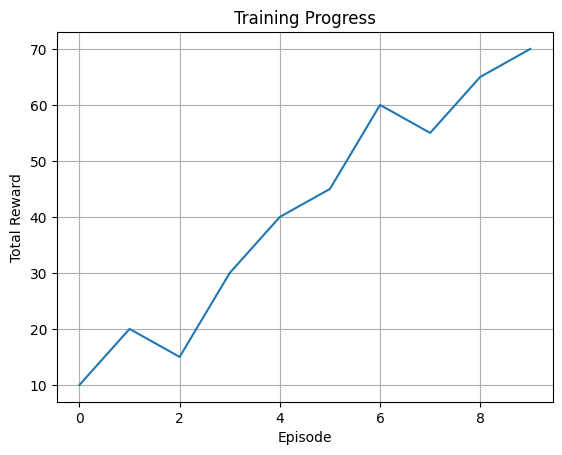

In [ ]:
import matplotlib.pyplot as plt

# Assume you have a list of episode_rewards
episode_rewards = [10, 20, 15, 30, 40, 45, 60, 55, 65, 70]

plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.grid(True)
plt.show()


You should observe whether rewards **trend upward** (agent improving) or **plateau** (needs tuning).

This code demonstrates how to record and visualize a full episode of interaction between a random agent and the CartPole-v1 environment using OpenAI Gym. It sets up a video recording system using the RecordVideo wrapper, while also displaying each rendered frame in real time within the notebook. By accessing the unwrapped environment’s rendering method, the code ensures the pole’s motion is animated as the agent takes random actions. The agent continues interacting until the episode ends—either by successfully balancing the pole for long enough or by failing. After closing the environment, the recorded video is optionally displayed, allowing for both live visualization and playback of the agent’s behavior. This setup is useful for debugging, demonstration, and analyzing an agent’s performance.

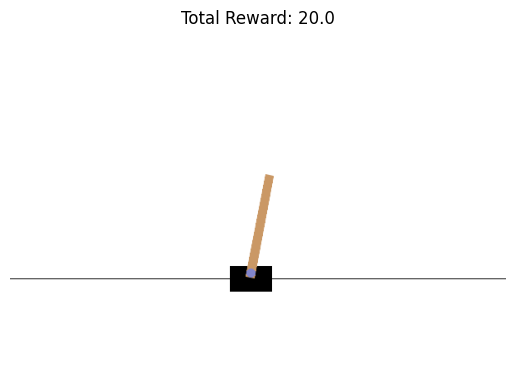

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4


In [7]:
# Install required libraries if needed
# !pip install -q gym moviepy imageio matplotlib

import gym
from gym.wrappers import RecordVideo
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, Video
import os
import shutil
import time

# Set up video folder
video_folder = "./videos"
shutil.rmtree(video_folder, ignore_errors=True)

# Create the environment with rendering and video recording
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda e: True) # Wrap the environment to record videos; record every episode (episode_trigger always returns True)


obs, _ = env.reset()
done = False
total_reward = 0

while not done:
    # Access the underlying env to get a renderable frame
    frame = env.env.render()

    # Display the current frame
    clear_output(wait=True)
    plt.imshow(frame)
    plt.axis("off")
    plt.title(f"Total Reward: {total_reward}")
    plt.show()
    time.sleep(0.05)

    # Take a random action
    action = env.action_space.sample()
    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    total_reward += reward

env.close()

# Display the saved video file (optional)
video_path = os.path.join(video_folder, "rl-video-episode-0.mp4")
if os.path.exists(video_path):
    display(Video(video_path, embed=True))


**After running**, you will find a saved MP4 video inside the `./videos/` directory!

### Real-World RL Example: Taxi-v3 Environment (OpenAI Gym)

🚕 Taxi-v3 is a classic reinforcement learning environment where a taxi agent must learn to pick up and drop off passengers at the correct locations.

The agent receives:

- +20 for a successful drop-off,

- –1 per time step (to encourage efficiency),

- –10 for illegal actions (like picking up from the wrong spot).

It’s a discrete, small, and fully solvable environment — making it perfect for students and beginners.

Beyond academics, it reflects real-world logistics challenges faced by systems like Uber, Lyft, or delivery services, making it both practical and educational.

In the Taxi-v3 environment from OpenAI Gym, there are 6 possible actions an agent can take. These actions are represented by integers from 0 to 5 in the code, and they correspond to:

0 – South: Move the taxi one cell down.

1 – North: Move the taxi one cell up.

2 – East: Move the taxi one cell to the right.

3 – West: Move the taxi one cell to the left.

4 – Pickup: Pick up a passenger if the taxi is at the passenger's location.

5 – Dropoff: Drop off the passenger if the taxi is at the correct destination.


Training completed!


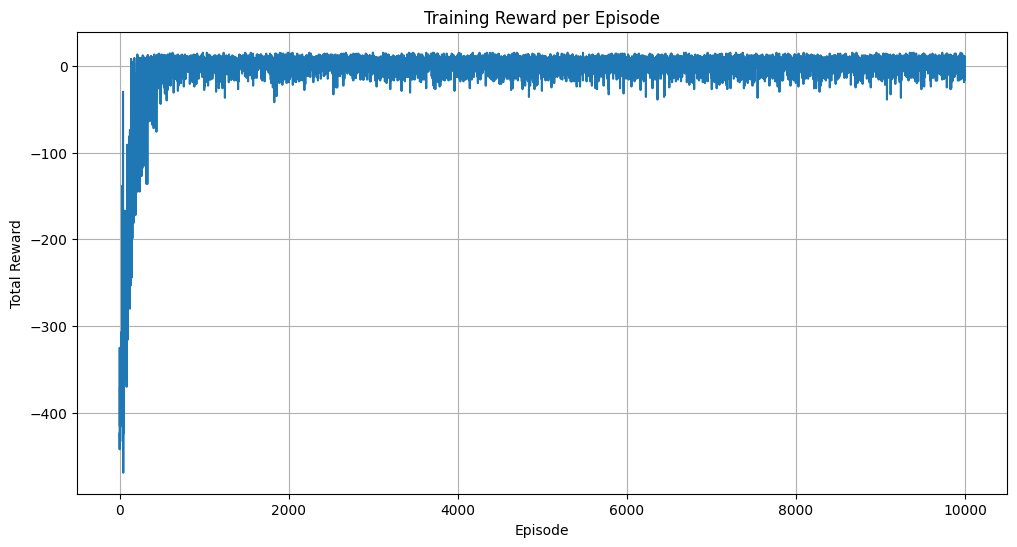


🛫 Starting the trained Taxi agent...

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | :_:

In [ ]:
# Install and import libraries
# !pip install -q gym  # Uncomment if running for the first time in Colab

import numpy as np                     # For numerical operations and Q-table
import gym                            # To create the Taxi environment
import random                         # For epsilon-greedy strategy
import matplotlib.pyplot as plt       # For plotting reward trends
import time                           # For slowing down test animation

# 🛺 Create the Taxi environment with text (ANSI) rendering
env = gym.make("Taxi-v3", render_mode="ansi")

# Initialize Q-table with zeros
state_size = env.observation_space.n    # Total number of states (500)
action_size = env.action_space.n        # Total number of actions (6)
q_table = np.zeros((state_size, action_size))

# Hyperparameters
alpha = 0.7                 # Learning rate: how much new info overrides old
gamma = 0.618               # Discount factor: future reward importance
epsilon = 1.0               # Initial exploration rate
epsilon_min = 0.1           # Minimum epsilon (exploration stops decaying here)
epsilon_decay = 0.005       # How much epsilon decreases per episode
training_episodes = 10000   # Number of training episodes
max_steps = 100             # Max steps per episode to prevent infinite loops

# Track total rewards for plotting
rewards_per_episode = []

# Q-Learning Training Loop
for episode in range(training_episodes):
    state, info = env.reset()  # Reset env at the start of episode
    terminated = False
    truncated = False
    total_rewards = 0          # Cumulative reward for this episode

    for step in range(max_steps):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit best known action

        # Take the action
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Q-value update using Bellman Equation
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Move to next state and accumulate rewards
        state = next_state
        total_rewards += reward

        if done:
            break  # Exit the loop if episode ends

    # Decay epsilon after each episode
    epsilon = max(epsilon_min, epsilon - epsilon_decay)

    # Store reward for plotting
    rewards_per_episode.append(total_rewards)

print("\nTraining completed!")

# Plotting the training reward curve
plt.figure(figsize=(12,6))
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Reward per Episode')
plt.grid(True)
plt.show()

# Create a fresh test environment for evaluation
test_env = gym.make("Taxi-v3", render_mode="ansi")

# Run the trained agent
state, info = test_env.reset()
terminated = False
truncated = False
total_reward = 0

print("\nStarting the trained Taxi agent...\n")
print(test_env.render())  # Show initial state

while not (terminated or truncated):
    action = np.argmax(q_table[state])  # Always choose best action (no exploration)
    next_state, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated

    total_reward += reward
    state = next_state

    print(test_env.render())  # Show updated state
    time.sleep(0.5)           # Slow down animation for better visibility

print(f"\nFinal Total Reward: {total_reward}")
test_env.close()

# Save Q-table to a file for later use
np.save("q_table.npy", q_table)

# To load the saved Q-table in the future, uncomment the line below:
# q_table = np.load("q_table.npy")


The results from the trained Q-learning agent in the Taxi-v3 environment demonstrate a successful application of reinforcement learning in a discrete, goal-oriented setting. After 10,000 training episodes, the agent effectively learned to complete the pickup and drop-off task without making illegal moves, as reflected in the final total reward of 9. This score indicates that the agent received the +20 reward for a successful drop-off but incurred several –1 penalties for each step taken, suggesting a slightly suboptimal yet correct route. The environment renderings show the agent navigating the grid logically—first moving toward the passenger, executing a valid pickup, and then traveling to the designated drop-off location. This outcome highlights the agent's ability to internalize the environment's rules and improve over time, showcasing Q-learning's effectiveness in teaching sequential decision-making through exploration and reward feedback.

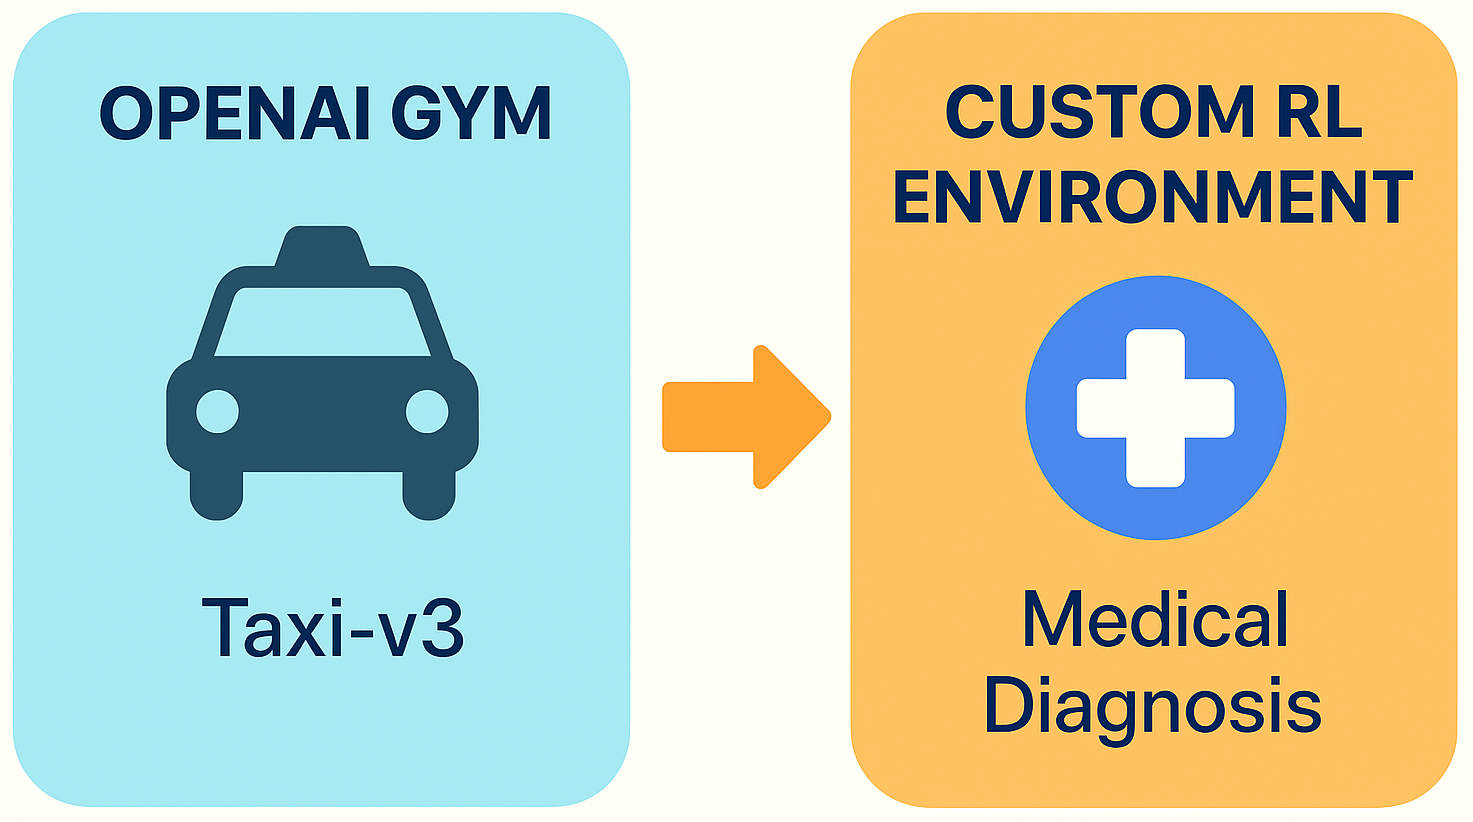

We're showing a progression from using a ready-made Gym environment (Taxi-v3) to building our own simplified, task-specific RL environment (DiagnosisEnv) that interacts with real medical data.

This shift illustrates:

- A move from abstract RL tasks to a real-world application (diagnosing cancer).

- How reinforcement learning can be adapted to non-traditional environments.

- How Q-learning can work even in single-step environments using structured data.



This code demonstrates a teaching-friendly implementation of tabular Q-learning applied to a medical diagnosis task using the Breast Cancer dataset. It treats each patient as a one-step reinforcement learning episode, where the agent predicts whether a case is malignant or benign and receives a reward based on accuracy. The Q-table is updated through exploration and exploitation, and performance is evaluated using a nearest-neighbor approach to generalize to unseen test data. This simplified setup is ideal for illustrating core reinforcement learning concepts like Q-value updates, reward feedback, and ε-greedy action selection.

Train samples: 455, Test samples: 114

Training completed!


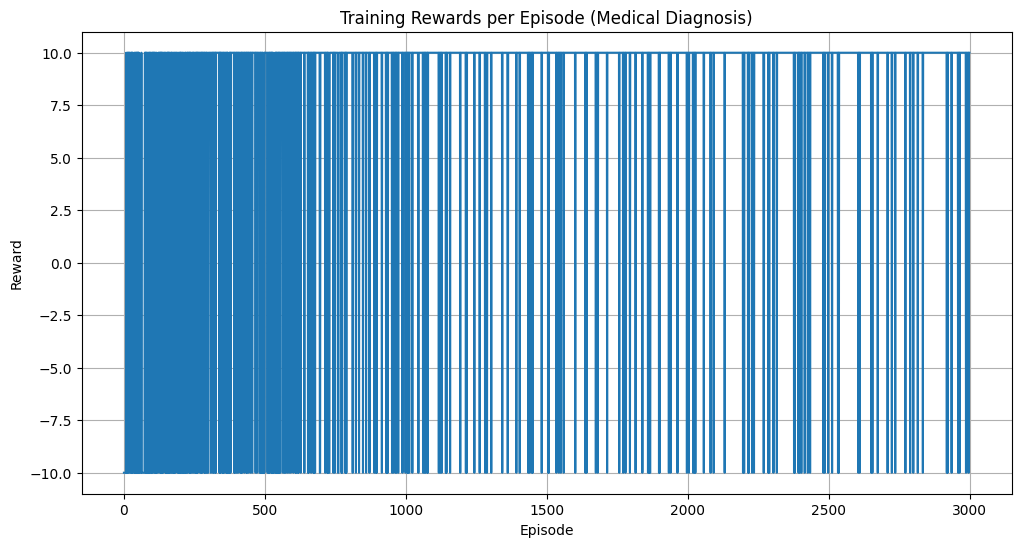


Test Accuracy (approximate via nearest match): 92.98%


In [ ]:
# !pip install -q scikit-learn pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


# Create a custom RL environment
class DiagnosisEnv:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.n_samples = len(X)

    def reset(self):
        self.index = random.randint(0, self.n_samples - 1)
        return self.index  # Use index as the state

    def step(self, action):
        label = self.y[self.index]
        reward = +10 if action == label else -10
        done = True  # One-step episode
        info = {"true_label": label}
        return reward, done, info


# Environment setup
env = DiagnosisEnv(X_train, y_train)
state_size = len(X_train)
action_size = 2  # 0 or 1 (malignant or benign)

# Initialize Q-table
q_table = np.zeros((state_size, action_size))

# Hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.005
episodes = 3000

# Track training performance
rewards_per_episode = []

# Training loop
for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    # Action selection (ε-greedy)
    if random.uniform(0, 1) < epsilon:
        action = random.choice([0, 1])
    else:
        action = np.argmax(q_table[state])

    # Take action
    reward, done, info = env.step(action)
    old_value = q_table[state, action]
    next_max = np.max(q_table[state])  # No next state; one-step

    # Q-table update
    q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

    total_reward += reward
    epsilon = max(epsilon_min, epsilon - epsilon_decay)
    rewards_per_episode.append(total_reward)

print("\nTraining completed!")

# Plot training rewards
plt.figure(figsize=(12, 6))
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Rewards per Episode (Medical Diagnosis)')
plt.grid(True)
plt.show()

# Test phase using test set
correct = 0
total = len(X_test)

# Use k-nearest neighbor trick: pick closest training example
from sklearn.metrics.pairwise import euclidean_distances

for i in range(total):
    # Find nearest training point to test sample
    dists = euclidean_distances([X_test[i]], X_train).flatten()
    closest_index = np.argmin(dists)

    action = np.argmax(q_table[closest_index])
    if action == y_test[i]:
        correct += 1

accuracy = correct / total * 100
print(f"\nTest Accuracy (approximate via nearest match): {accuracy:.2f}%")

### Reinforcement Learning Concepts in `DiagnosisEnv`

In the custom environment built around medical diagnosis (`DiagnosisEnv`), we still preserve all the core components of a reinforcement learning (RL) framework. Here's how each standard RL concept maps to elements in your code:

| **RL Concept**  | **In `DiagnosisEnv`**                                                              |
| --------------- | ---------------------------------------------------------------------------------- |
| **Agent**       | The Q-learning algorithm — it chooses actions based on a Q-table.                  |
| **Environment** | The custom `DiagnosisEnv` class, simulating the diagnosis task using patient data. |
| **State**       | A randomly selected index corresponding to a specific patient/sample in `X_train`. |
| **Action**      | Binary decision: `0` (predict malignant) or `1` (predict benign).                  |
| **Reward**      | `+10` for a correct diagnosis, `-10` for an incorrect one.                         |
| **Episode**     | One diagnosis event: a single-step episode that ends right after the action.       |
| **Done**        | Always `True` after one action, because each episode consists of one decision.     |
| **Policy**      | The learned Q-table that maps patient indices to the best predicted action.        |

### Key Differences from Typical RL Environments

* **Episodes are single-step** — unlike games where agents take a sequence of actions, here the agent makes one diagnosis per episode.
* **No transitions or next state** — the state doesn’t evolve, making this a static decision problem.
* **States are represented by sample indices**, and the actual features are looked up separately from the dataset.

This environment shows how RL can be creatively applied to real-world classification problems, like medical diagnosis, by framing prediction as a reward-driven decision task.


This code uses a Deep Q-Network (DQN) to train an agent that learns to classify breast cancer samples as malignant or benign by receiving a reward for correct predictions. Each training episode samples a patient, uses the feature vector as the input state, and chooses an action (diagnosis) using an ε-greedy strategy. The neural network learns to estimate Q-values for each action, which are updated based on the reward received. After training, the model is evaluated on a test set, achieving classification accuracy by selecting the highest-Q action for each test patient. The approach illustrates how reinforcement learning, particularly DQN, can be applied to high-dimensional data and decision-making tasks outside traditional game environments — making it a valuable educational example for applying RL in healthcare.



Train samples: 455, Test samples: 114

DQN Training completed!


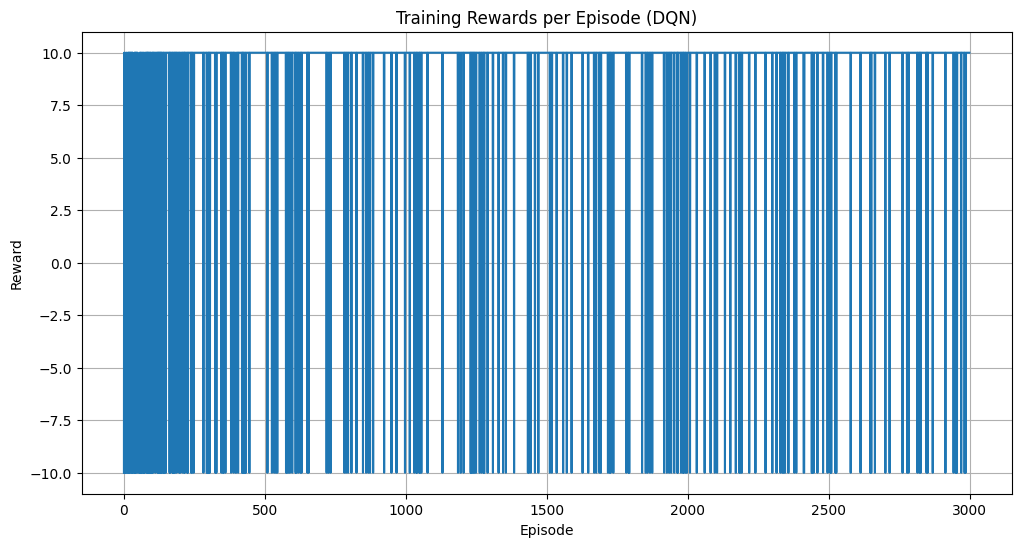


DQN Test Accuracy: 98.25%

Deep Reinforcement Learning for Medical Diagnosis Complete!


In [ ]:
# Deep Q-Learning (DQN) for Medical Diagnosis - Final Notebook

# --- Step 1: Install and Import Libraries ---
#!pip install -q torch torchvision scikit-learn

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

# --- Step 2: Load and Prepare the Dataset ---
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

# --- Step 3: Define the Deep Q-Network (DQN) ---
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# --- Step 4: Initialize Model, Optimizer, and Loss ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = X_train.shape[1]
output_dim = 2  # Two actions: 0 (malignant), 1 (benign)

model = DQN(input_dim, output_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# --- Step 5: Deep Q-Learning Training Loop ---
# Hyperparameters
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.995
episodes = 3000

rewards_per_episode = []

for episode in range(episodes):
    idx = random.randint(0, len(X_train)-1)
    state = torch.FloatTensor(X_train[idx]).unsqueeze(0).to(device)
    true_label = y_train[idx]

    # ε-greedy strategy
    if random.uniform(0, 1) < epsilon:
        action = random.choice([0, 1])
    else:
        with torch.no_grad():
            q_values = model(state)
            action = torch.argmax(q_values).item()

    # Reward assignment
    reward = 10 if action == true_label else -10

    # Q-Learning update
    target = reward
    with torch.no_grad():
        target_q = target

    q_values = model(state)
    loss = loss_fn(q_values[0, action], torch.tensor(target_q).to(device).float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode.append(reward)

print("\nDQN Training completed!")

# --- Step 6: Visualize Training Rewards ---
plt.figure(figsize=(12,6))
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Rewards per Episode (DQN)')
plt.grid(True)
plt.show()

# --- Step 7: Test the Deep Q-Learning Agent ---
correct = 0
total = len(X_test)

model.eval()

for i in range(total):
    state = torch.FloatTensor(X_test[i]).unsqueeze(0).to(device)
    with torch.no_grad():
        q_values = model(state)
        action = torch.argmax(q_values).item()

    if action == y_test[i]:
        correct += 1

accuracy = correct / total * 100
print(f"\nDQN Test Accuracy: {accuracy:.2f}%")

# --- Final Notes ---
# - DQN enabled us to generalize from real patient features.
# - Instead of memorizing states, it learned meaningful diagnosis patterns.
# - In real-world medical AI, using DQNs or advanced RL is crucial when states are high-dimensional!

print("\nDeep Reinforcement Learning for Medical Diagnosis Complete!")

### Reinforcement Learning Concepts in DQN-Based Medical Diagnosis

In the DQN-based approach to medical diagnosis, we maintain the essential components of a reinforcement learning (RL) system, but now leverage a deep neural network to approximate Q-values instead of a tabular Q-table. Here's how the core RL concepts are represented in this deep learning setup:

| **RL Concept**  | **In the DQN Medical Diagnosis Code**                                                               |
| --------------- | --------------------------------------------------------------------------------------------------- |
| **Agent**       | The deep Q-network (`DQN` class) that predicts Q-values for each possible diagnosis action.         |
| **Environment** | The diagnosis task, using real-world breast cancer data (loaded and split from `sklearn.datasets`). |
| **State**       | A patient feature vector (`X_train[idx]`), representing the current diagnostic case.                |
| **Action**      | Binary choice: `0` (malignant) or `1` (benign).                                                     |
| **Reward**      | `+10` for a correct diagnosis, `-10` for an incorrect one.                                          |
| **Episode**     | One patient diagnosis: a single decision and immediate reward.                                      |
| **Done**        | Implicitly `True` after each step — episodes are one-step.                                          |
| **Policy**      | The strategy learned by the DQN to choose the best action for any given patient feature vector.     |

### Key Highlights of the DQN Setup

* **Function approximation**: Instead of using a Q-table indexed by state, we use a neural network that generalizes across high-dimensional state space.
* **Generalization**: The agent can diagnose unseen patients (test data) because it learns patterns in the feature space.
* **One-step episodes**: Like the previous Q-learning setup, each episode involves a single diagnosis, making it a simplified classification framed as RL.

This setup transitions reinforcement learning into a deep learning context, showcasing how deep Q-networks can support decision-making in complex, real-world domains such as medical diagnostics.


### Fine-Tuning and Transfer Learning in Reinforcement Learning (RL)

Reinforcement Learning (RL) can leverage concepts from traditional machine learning like **fine-tuning** and **transfer learning**, though the application is more complex due to the interactive nature of RL environments.


#### Fine-Tuning in RL

Fine-tuning in RL involves:

* Starting with a **pretrained agent**, such as one trained in a simulated or simpler environment.
* Continuing training on a **new but related environment or task**.
* This approach is useful when the environments share similar **state spaces**, **dynamics**, or **objectives**.

**Example**: Pretraining a robotic agent to walk in simulation and then fine-tuning it on real-world terrain.



#### Transfer Learning in RL

Transfer learning in RL aims to:

* **Reuse knowledge** (such as policies, value functions, or learned representations) from one task to accelerate learning on another.
* Help the agent learn faster and more effectively in new environments.

**Techniques include**:

* **Weight initialization**: Using neural network weights from a previously trained policy.
* **Representation learning**: Transferring feature encoders learned on prior tasks.
* **Meta-RL**: Training agents that quickly adapt to new tasks with minimal data (like few-shot learning).



#### Key Differences from Supervised Learning

| Aspect          | Supervised Learning      | Reinforcement Learning                 |
| --------------- | ------------------------ | -------------------------------------- |
| Training Data   | Fixed dataset            | Generated interactively by agent       |
| Transfer Target | Models trained on labels | Policies, Q-values, or encoders        |
| Stability       | Typically stable         | Often high variance, exploration-heavy |


#### Real-World Use Cases

* Pretrained agents reduce computational cost.
* Useful in **robotics**, **game AI**, **multi-task RL**, and **healthcare policy learning**.

Fine-tuning and transfer learning are powerful tools that extend RL from isolated tasks to adaptable, scalable learning systems.


## Comparison of Machine Learning Paradigms: Computational Complexity and Learning Behavior

| **Aspect**               | **Supervised Learning**                       | **Unsupervised Learning**            | **Bayesian Methods**                                 | **Reinforcement Learning**                         |
| ------------------------ | --------------------------------------------- | ------------------------------------ | ---------------------------------------------------- | -------------------------------------------------- |
| **Data Type**            | Labeled data (inputs + outputs)               | Unlabeled data                       | Either, often with prior distributions               | Experience (state, action, reward, next state)     |
| **Learning Goal**        | Predict outputs accurately                    | Discover structure/patterns          | Estimate posterior distributions                     | Learn optimal policy for long-term reward          |
| **Training Process**     | One-pass, fixed dataset                       | One-pass, fixed dataset              | Inference with priors/posteriors                     | Sequential, interactive, trial-and-error           |
| **Feedback Timing**      | Immediate (target is known)                   | No explicit feedback                 | Varies (based on probabilistic model)                | Delayed (rewards may come much later)              |
| **Exploration Needed**   | No (all data is provided)                     | No                                   | Sometimes (in Bayesian optimization)                 | Yes (agent must try new actions)                   |
| **Computational Cost**   | Low to moderate                               | Moderate                             | High (inference, sampling)                           | High (many episodes, environment interaction)      |
| **Convergence Behavior** | Fast and stable (if data is clean)            | Depends on initialization and method | Can be slow, depends on convergence of distributions | Can be slow, unstable, especially in sparse reward |
| **Examples**             | Linear Regression, SVM, CNN, Transformers     | K-Means, PCA, Autoencoders           | Gaussian Processes, Bayesian Neural Networks         | Q-Learning, Policy Gradient, DQN, PPO              |
| **Use Case**             | Classification, Regression, Image Recognition | Clustering, Dimensionality Reduction | Uncertainty Estimation, Small-data Learning          | Robotics, Games, Navigation, Adaptive Control      |

This table helps position reinforcement learning as a powerful but computationally intensive method, especially suited for problems involving decision-making over time. It builds on the foundations students learn in supervised and unsupervised learning, while introducing new challenges like exploration, delayed feedback, and policy optimization.
